### Feature Selection

### Technique-1: Filter based technique

#### a) Duplicate Columns

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('human activity.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [3]:
df = df.drop('subject',axis=1)

In [4]:
x = df.drop('Activity',axis=1)
y = df['Activity']

In [5]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
y = label.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
x_test.shape

(590, 561)

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_pred = model.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.988135593220339

In [11]:
def get_duplicate_columns(df): 
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [12]:
duplicate = get_duplicate_columns(x_train)

In [13]:
x_train.shape

(2357, 561)

In [14]:
duplicate

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [15]:
for list in duplicate.values():
    x_train.drop(columns=list,inplace=True)
    x_test.drop(columns=list,inplace=True)

In [16]:
# Almost 21 columns been dropped
x_train.shape

(2357, 540)

#### b) Variance Threshold
- It works with the variance of feature if that feature has less variance then input threshold that feature will be dropped

In [17]:
from sklearn.feature_selection import VarianceThreshold

variance_sel = VarianceThreshold(threshold=0.05)

In [18]:
variance_sel.fit(x_train)

VarianceThreshold(threshold=0.05)

In [19]:
sum(variance_sel.get_support())

326

In [20]:
columns = x_train.columns[variance_sel.get_support()]

In [21]:
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=326)

In [22]:
x_train = variance_sel.transform(x_train)
x_test = variance_sel.transform(x_test)

x_train = pd.DataFrame(x_train,columns=columns)
x_test = pd.DataFrame(x_test,columns=columns)

In [25]:
x_test.shape

(590, 326)

### c) Correlation

In [26]:
import seaborn as sns

<AxesSubplot:>

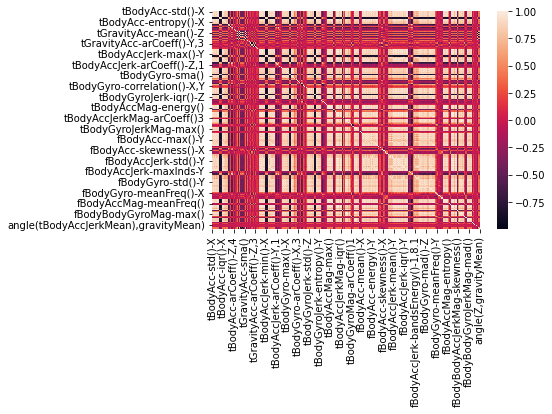

In [27]:
sns.heatmap(x_train.corr())

In [31]:
corr_matrix = x_train.corr()

In [29]:
columns = x_train.columns

In [33]:
cols_to_drop = []

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        if corr_matrix.loc[columns[i],columns[j]] > 0.95:
            cols_to_drop.append(columns[j])

print(len(cols_to_drop))

1403


In [35]:
cols_to_drop = set(cols_to_drop)
len(cols_to_drop)

182

In [39]:
x_train.drop(columns=cols_to_drop,axis=1,inplace=True)
x_test.drop(columns=cols_to_drop,axis=1,inplace=True)

In [40]:
x_test.shape

(590, 144)

In [41]:
x_train.shape

(2357, 144)

### d) Anova

In [47]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

sel_best = SelectKBest(f_classif,k=100).fit(x_train,y_train)
x_train.columns[sel_best.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X',
       'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X',
       'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z',
       'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2',
       'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tGravityAcc-mean()-X',
       'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tGravityAcc-sma()',
       'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-arCoeff()-Y,1',
       'tGravityAcc-arCoeff()-Y,2', 'tGravityAcc-arCoeff()-Z,1',
       'tGravityAcc-arCoeff()-Z,2', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-energy()-Y', 'tBodyAccJerk-entropy()-X',
       'tBodyAccJerk-arCoeff()-X,3', '

In [48]:
columns = x_train.columns[sel_best.get_support()]

In [49]:
x_train = sel_best.transform(x_train)
x_test = sel_best.transform(x_test)

In [51]:
x_test.shape

(590, 100)

In [52]:
x_train.shape

(2357, 100)

In [53]:
x_train = pd.DataFrame(x_train,columns=columns)
x_test = pd.DataFrame(x_test,columns=columns)

In [55]:
x_test.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,...,fBodyGyro-skewness()-Z,fBodyAccMag-maxInds,fBodyAccMag-meanFreq(),fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyGyroMag-meanFreq(),"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.050195,0.549375,-0.021932,0.072064,-0.305345,0.185219,-0.463881,0.093797,0.355700,0.422583,...,-0.449828,-0.379310,0.110217,-0.065235,0.261412,0.479296,0.019480,-0.676807,0.285570,0.141421
1,-0.218427,0.129495,-0.303213,-0.001843,-0.186612,0.050252,-0.234678,0.475238,0.511650,0.440316,...,-0.497529,-0.931034,0.299080,-0.569626,-0.280604,-0.210690,0.314970,-0.802479,0.232030,-0.009791
2,-0.200641,-0.047202,-0.371207,-0.079823,-0.305884,0.027481,0.031907,0.470138,0.582755,0.192128,...,0.053305,-0.448276,0.037276,-0.787920,0.319888,-0.617894,-0.194792,-0.757358,0.260860,-0.023703
3,-0.171805,-0.142442,-0.286599,-0.118848,-0.326570,0.110456,0.212681,0.535895,0.481951,0.308224,...,-0.358258,-0.448276,-0.115925,-0.447808,0.131661,-0.377091,-0.003255,-0.784310,0.236263,-0.040060
4,-0.399513,-0.223451,-0.478751,-0.131328,-0.514146,0.324963,0.177134,0.518200,0.121095,0.048422,...,-0.401601,-0.517241,-0.018457,-0.618769,0.265292,0.205820,-0.404886,-0.778701,0.234378,-0.053945


### Now performing Logistic regression again
- We have reduced columns from 561 to 100 lets check the accuracy of our model again

In [56]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [57]:
y_pred = model1.predict(x_test)

In [58]:
score1 = accuracy_score(y_test,y_pred)
score1

0.9711864406779661

#### We can see that although we have dropped almost 461 columns but still we are getting accuracy of 97 which firstly was 98 

### Chi-square test

In [59]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
ct = pd.crosstab(data['Survived'],data['Sex'],margins=True)
ct

Sex,female,male,All
Survived,,,
0,0,266,266
1,152,0,152
All,152,266,418


In [65]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

(418.0,
 3.586514384057183e-89,
 4,
 array([[ 96.72727273, 169.27272727, 266.        ],
        [ 55.27272727,  96.72727273, 152.        ],
        [152.        , 266.        , 418.        ]]))

In [73]:
titanic = data[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]

In [103]:
score = []

for feature in titanic.columns[:-1]:
    
    # create contingency table
    ct = pd.crosstab(titanic['Survived'], titanic[feature])
    
    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

In [104]:
score

[0.03519206276590605,
 5.767311139789629e-92,
 0.033092313600883064,
 0.0005106898057600887,
 0.03039815424608473]

<AxesSubplot:>

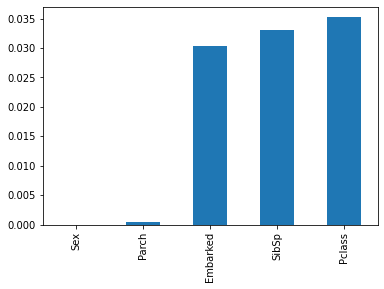

In [105]:
pd.Series(score, index=titanic.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

In [82]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from matplotlib import pyplot as plt

encode = LabelEncoder()
titanic_encode = titanic.apply(encode.fit_transform)
titanic_encode

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,2,1,0,0,1,0
1,2,0,1,0,2,1
2,1,1,0,0,1,0
3,2,1,0,0,2,0
4,2,0,1,1,2,1
...,...,...,...,...,...,...
413,2,1,0,0,2,0
414,0,0,0,0,0,1
415,2,1,0,0,2,0
416,2,1,0,0,2,0


In [83]:
x = titanic_encode.drop('Survived',axis=1)
y = titanic_encode['Survived']

In [89]:
chi_scores = chi2(x,y)
# Denotes p-values
chi_scores[1]

array([9.69633406e-02, 6.33615771e-35, 7.31322789e-03, 4.08869618e-07,
       2.60937975e-01])

In [88]:
chi_scores

(array([  2.75479341, 152.        ,   7.19437939,  25.65200893,
          1.26377377]),
 array([9.69633406e-02, 6.33615771e-35, 7.31322789e-03, 4.08869618e-07,
        2.60937975e-01]))

In [100]:
p_values = pd.Series(chi_scores[1], index = x.columns)
p_values.sort_values(inplace = True)

In [101]:
p_values

Sex         6.336158e-35
Parch       4.088696e-07
SibSp       7.313228e-03
Pclass      9.696334e-02
Embarked    2.609380e-01
dtype: float64

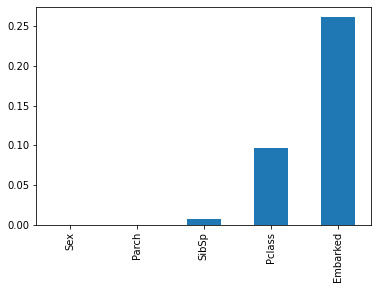

In [102]:
p_values.plot(kind='bar')
plt.show()